In [1]:
print("NETWORK INTRUSION DETECTION")

NETWORK INTRUSION DETECTION


In [2]:
#IMPORT THE LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import joblib
import seaborn as sns
from scipy.stats import zscore
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6)

In [3]:
# DEFINING COLUMNS NAME
columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
    'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label', 'difficulty'
]


In [4]:
#setting the os path
base_path = os.path.expanduser("~/Downloads/NSL-KDD")

In [5]:
#setting the files path
train_file = os.path.join(base_path, "kdd_train.csv")
test_file = os.path.join(base_path, "kdd_test.csv")

In [6]:
#load the csv files
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)


In [7]:
# Show info about the data
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print(train_df.head())

Train shape: (125973, 42)
Test shape: (22544, 42)
   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                   0.170                   0.030   
1                   0.000                   0.600   
2  

In [8]:
#handles the missing values
print("Missing values:\n", train_df.isnull().sum())

Missing values:
 duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate             

In [9]:
#encode categorical features
categorical_cols = ['protocol_type', 'service', 'flag']
encoder = LabelEncoder()
for col in categorical_cols:
    train_df[col] = encoder.fit_transform(train_df[col])
    test_df[col] = encoder.transform(test_df[col])

In [10]:
print(train_df.columns)


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')


In [11]:
# Convert attack labels to binary
def label_binary(x):
    return 1 if x == 'normal' else 0

train_df['labels'] = train_df['labels'].apply(label_binary)
test_df['labels'] = test_df['labels'].apply(label_binary)

In [12]:
# Separate features and labels
X_train = train_df.drop('labels', axis=1)  # Drop target column
y_train = train_df['labels']  # Target column
X_test = test_df.drop('labels', axis=1)  # Drop target column
y_test = test_df['labels']  # Target column

In [13]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

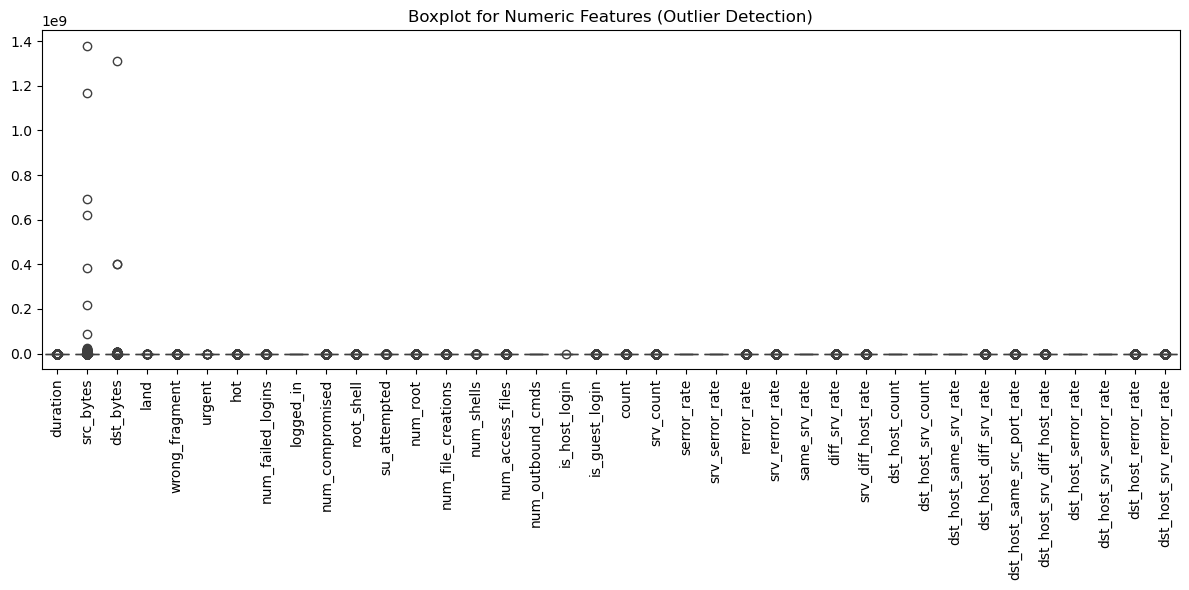

Outliers detected: 22855


In [14]:
# TO DETECT OUTLIERS USING BOXPLOTS AND Z-SCORES
df = pd.read_csv('/Users/sagarpetwal/Downloads/NSL-KDD/kdd_train.csv')

# Split dataset into features and target
X = df.iloc[:, :-1]  # All columns except the last
y = df.iloc[:, -1]   # Last column

# Select numeric columns
numeric_cols = X.select_dtypes(include=[np.number])

# Calculate Z-scores
z_scores = np.abs(zscore(numeric_cols))

# Identify outliers
threshold = 3
outliers = (z_scores > threshold).any(axis=1)

# Visualize with boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_cols)
plt.title("Boxplot for Numeric Features (Outlier Detection)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print outlier count
print(f"Outliers detected: {np.sum(outliers)}")



In [15]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [16]:
# TRAIN THE MODEL
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

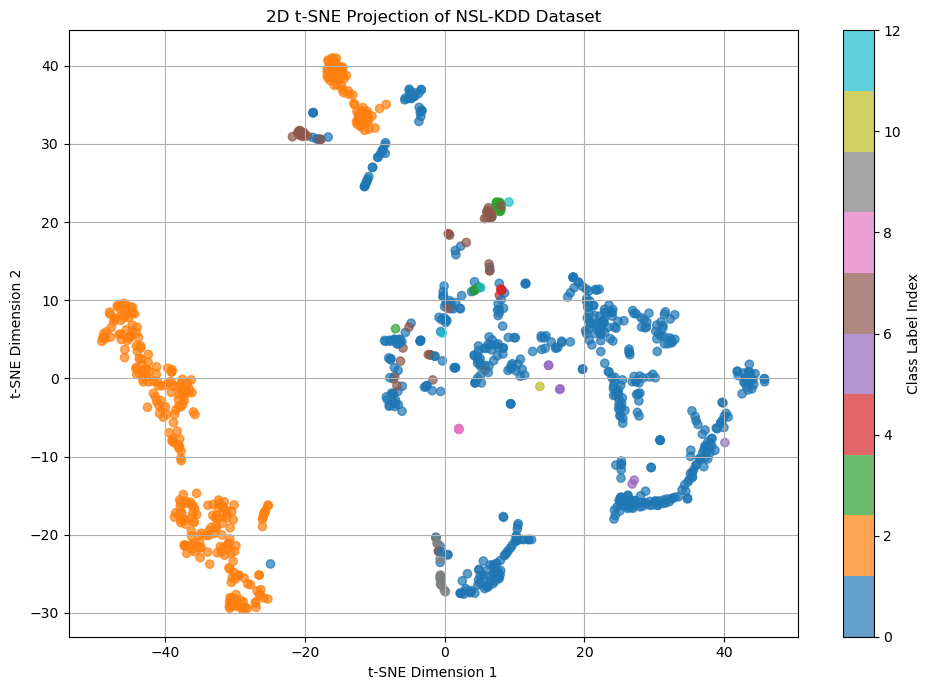

In [17]:
# Split into features and labels
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Labels

# Keep only numeric columns for t-SNE
X_numeric = X.select_dtypes(include=[np.number])

# Standardize the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Reduce the number of points for t-SNE (optional but highly recommended)
sample_size = 1000
random_indices = np.random.choice(len(X_scaled), size=sample_size, replace=False)
X_sample = X_scaled[random_indices]
y_sample = y.iloc[random_indices].reset_index(drop=True)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_sample)

# Plot the t-SNE projection
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=pd.factorize(y_sample)[0], cmap='tab10', alpha=0.7)
plt.title('2D t-SNE Projection of NSL-KDD Dataset')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(scatter, label='Class Label Index')
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)

In [19]:
# Evaluate the model
print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     11299
           1       0.88      0.99      0.93     11245

    accuracy                           0.93     22544
   macro avg       0.94      0.93      0.93     22544
weighted avg       0.94      0.93      0.93     22544

Accuracy: 0.9282292405961675


In [20]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider at each split
}

In [21]:
# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


In [22]:
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [23]:
# Print the best parameters found by GridSearchCV
print("Best Parameters from GridSearchCV:")
print(grid_search.best_params_)


Best Parameters from GridSearchCV:
{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [24]:
# Use the best model to make predictions
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

In [25]:
# Evaluate the tuned model
print("Random Forest Classifier Report (Tuned):")
print(classification_report(y_test, y_pred_rf))
print("Accuracy (Tuned):", accuracy_score(y_test, y_pred_rf))

Random Forest Classifier Report (Tuned):
              precision    recall  f1-score   support

           0       0.99      0.87      0.93     11299
           1       0.88      0.99      0.93     11245

    accuracy                           0.93     22544
   macro avg       0.94      0.93      0.93     22544
weighted avg       0.94      0.93      0.93     22544

Accuracy (Tuned): 0.9296043293115684


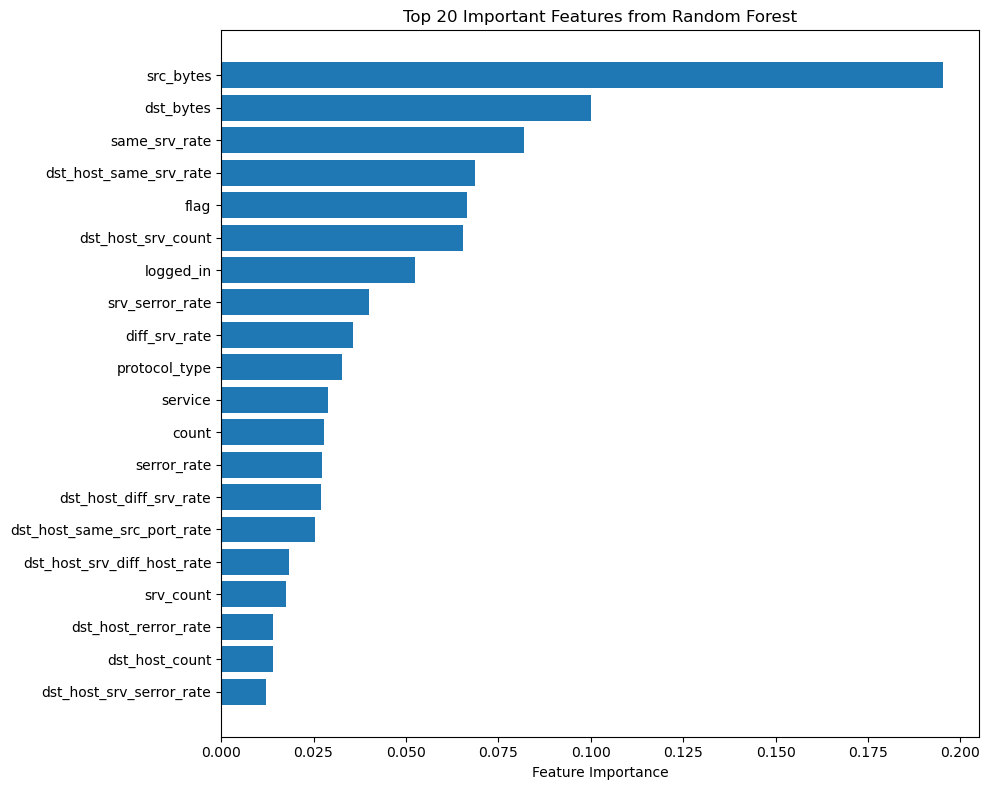

In [26]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train.shape[1]  # number of features

# Create a DataFrame for feature importances
importances_df = pd.DataFrame({
    'Feature': train_df.drop('labels', axis=1).columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 20 important features
plt.figure(figsize=(10, 8))
plt.barh(importances_df['Feature'][:20][::-1], importances_df['Importance'][:20][::-1])
plt.xlabel('Feature Importance')
plt.title('Top 20 Important Features from Random Forest')
plt.tight_layout()
plt.show()

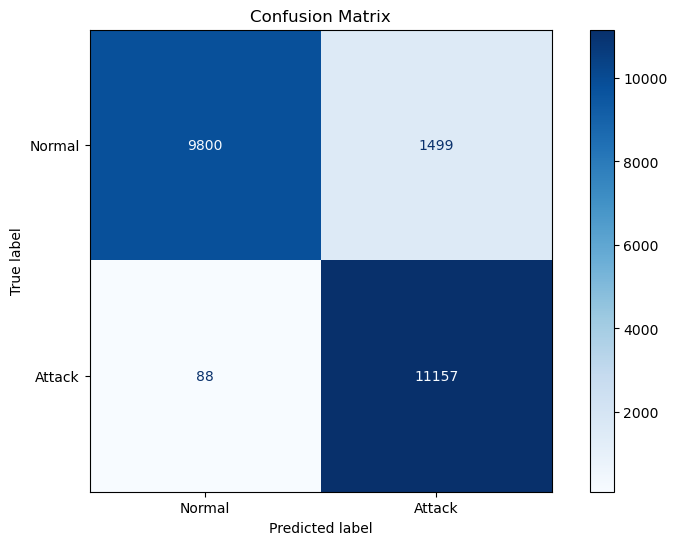

In [27]:
# Get confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Attack"])

# Plot
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

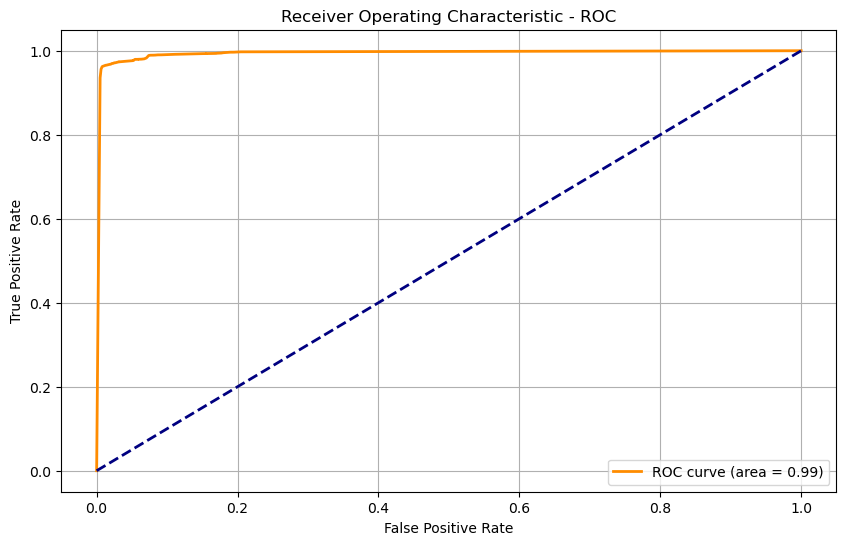

In [28]:
# Predict probabilities
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [29]:
# to save random forest model
try:
    joblib.dump(rf_model, "random_forest_model.pkl")
    print("Model saved successfully!")
except Exception as e:
    print(f"Error saving model: {e}")

Model saved successfully!


In [30]:
#to load random forest model
rf_model = joblib.load("random_forest_model.pkl")
print("Model loaded successfully!")

Model loaded successfully!


In [31]:
# Define the path to save the model 
model_path = "/Users/sagarpetwal/Downloads/random_forest_model.pkl"

# Save the model
try:
    joblib.dump(rf_model, model_path)
    print(f"Model saved successfully at {model_path}")
except Exception as e:
    print(f"Error saving model: {e}")

Model saved successfully at /Users/sagarpetwal/Downloads/random_forest_model.pkl


In [32]:
# ROBUSTNESS TESTING 

#ADDING GAUSSIAN NOISE TO THE FEATURES

X_test_noisy = X_test.copy()
noise = np.random.normal(0, 0.1, X_test.shape)
X_test_noisy += noise

# Evaluate on noisy data
y_pred_noisy = rf_model.predict(X_test_noisy)
from sklearn.metrics import accuracy_score

accuracy_noisy = accuracy_score(y_test, y_pred_noisy)
print(f"Accuracy on Noisy Test Data: {accuracy_noisy:.4f}")

Accuracy on Noisy Test Data: 0.7951


In [33]:
# TEST ON UNSEEN ATTACKTYPES

# exclude certain attacks from training

train_filtered = train_df[~train_df['labels'].isin(['neptune', 'smurf'])]  # example
X_train_filtered = train_filtered.drop('labels', axis=1)
y_train_filtered = train_filtered['labels']

rf_model_filtered = RandomForestClassifier(n_estimators=100)
rf_model_filtered.fit(X_train_filtered, y_train_filtered)

# Now test on those excluded attacks
test_subset = test_df[test_df['labels'].isin(['neptune', 'smurf'])]
X_test_subset = test_subset.drop('labels', axis=1)
y_test_subset = test_subset['labels']

y_pred_subset = rf_model_filtered.predict(X_test_subset)
acc_subset = accuracy_score(y_test_subset, y_pred_subset)
print(f"Accuracy on unseen attacks (neptune/smurf): {acc_subset:.4f}")

ValueError: Found array with 0 sample(s) (shape=(0, 41)) while a minimum of 1 is required by RandomForestClassifier.

In [34]:
# Introduce missing values
X_test_missing = X_test.copy()
X_test_missing.iloc[::10, ::5] = np.nan  # every 10th row, every 5th column

# Fill missing values before prediction
X_test_filled = X_test_missing.fillna(X_test.mean())

y_pred_missing = rf_model.predict(X_test_filled)
print("Accuracy on test data with missing values:", accuracy_score(y_test, y_pred_missing))


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [35]:
labels = ['Original', 'Noisy', 'Missing Values', 'Unseen Attacks']
accuracies = [
    rf_model.score(X_test, y_test),
    accuracy_noisy,
    accuracy_score(y_test, y_pred_missing),
    acc_subset
]

plt.bar(labels, accuracies, color='skyblue')
plt.title('Model Robustness Evaluation')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

NameError: name 'y_pred_missing' is not defined